In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


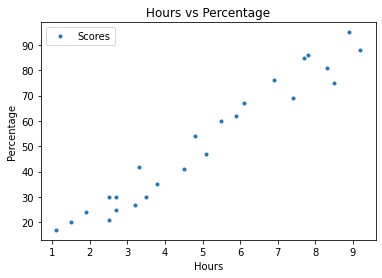

In [ ]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [ ]:
y = data['Scores'].values
X = data.drop(['Scores'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [ ]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
def MSE(y,p):
  sum=0
  for i in range(len(p)):
    sum=+np.square(y[i]-p[i])
  error=np.mean(sum)
  print(error)

In [ ]:

MSE(y_test,y_pred)

2.27698057044569


In [ ]:
h=9.25
s=model.predict(np.reshape(h,(-1,1)))
print("The student studying for 9.25 hours will score ",s[0])

The student studying for 9.25 hours will score  93.69173248737539


I'll try to add new features to recude the error,
But i don't really have data so ill try changing the hours column into quadratic equation and then fit it

In [ ]:
val=data['Hours'].values

In [ ]:
print(val)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]


In [ ]:
val=[(x*x+x) for x in val]


In [ ]:
print(val)

[8.75, 31.11, 13.440000000000001, 80.75, 15.75, 3.75, 93.83999999999999, 35.75, 77.19000000000001, 9.990000000000002, 66.99000000000001, 40.71, 24.75, 14.189999999999998, 2.3100000000000005, 88.11000000000001, 8.75, 5.51, 43.309999999999995, 62.160000000000004, 9.990000000000002, 27.84, 18.24, 54.510000000000005, 68.64]


In [ ]:
data1=data
data1['Hours_qudratic']=val

In [ ]:
data1.head()

,Hours,Scores,Hours_qudratic
0,2.5,21,8.75
1,5.1,47,31.11
2,3.2,27,13.44
3,8.5,75,80.75
4,3.5,30,15.75


In [ ]:
y_new = data1['Scores'].values
X_new = data1.drop(['Scores'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, 
                            test_size=0.2, random_state=0) 

In [ ]:
X_train_new.head()

,Hours,Hours_qudratic
22,3.8,18.24
17,1.9,5.51
24,7.8,68.64
23,6.9,54.51
14,1.1,2.31


In [ ]:
 
model1 = LinearRegression()  
model1.fit(X_train_new, y_train_new) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_new=model1.predict(X_test_new)

In [ ]:
print(y_pred_new)

[16.47312057 33.80024201 75.45486992 26.69813123 60.76675203]


In [ ]:

MSE(y_test_new,y_pred_new)

1.5209005677828842


In [ ]:
f=pd.DataFrame([[9.25,94.8125]])

In [ ]:
f.head()

,0,1
0,9.25,94.8125


I have reduced the test error compared to the previous model


In [ ]:
h=np.array(f)
s=model1.predict(h)
print("The student studying for 9.25 hours will score ",s[0])

The student studying for 9.25 hours will score  93.28171032489331
